# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

#Output CSV File
output_data_file = "output_data/cities.csv"

# range of lat & lon
lat = (-90, 90)
lng = (-180, 180)

In [67]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# # Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lng = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lng)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


### Generate the Cities List by Using the `citipy` Library

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [68]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{base_url}&units={units}&appid={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date


        # Append the City information into city_data list
        city_data.append(response["name"])
        city_lat.append(response["coord"]["lat"])
        city_lng.append(response["coord"]["lon"])
        city_max_temp.append(response["main"]["temp_max"])
        city_humidity.append(response["main"]["humidity"])
        city_clouds.append(response["clouds"]["all"])
        city_wind.append(response["wind"]["speed"])
        city_country.append(response["sys"]["country"])
        city_date.append(response["dt"])

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pedernales
Processing Record 2 of Set 1 | leoben
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | halol
Processing Record 7 of Set 1 | nova sintra
Processing Record 8 of Set 1 | sur
Processing Record 9 of Set 1 | iskateley
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | mejit
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | east ballina
Processing Record 14 of Set 1 | hamilton
Processing Record 15 of Set 1 | amuntai
Processing Record 16 of Set 1 | seward
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | st. john's
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | constantia
Processing Record 21 of Set 1 | damghan
Processing Record 22 of Set 1 | susuman
Process

Processing Record 39 of Set 4 | nicolosi
Processing Record 40 of Set 4 | badger
Processing Record 41 of Set 4 | capanema
Processing Record 42 of Set 4 | nephi
Processing Record 43 of Set 4 | mount gambier
Processing Record 44 of Set 4 | baardheere
Processing Record 45 of Set 4 | capitan bado
Processing Record 46 of Set 4 | severo-yeniseyskiy
Processing Record 47 of Set 4 | villa gesell
Processing Record 48 of Set 4 | nar'yan-mar
Processing Record 49 of Set 4 | kerben
Processing Record 0 of Set 5 | burang
Processing Record 1 of Set 5 | jinchang
Processing Record 2 of Set 5 | utrik
Processing Record 3 of Set 5 | cumaribo
City not found. Skipping...
Processing Record 4 of Set 5 | sretensk
Processing Record 5 of Set 5 | knysna
Processing Record 6 of Set 5 | tolanaro
Processing Record 7 of Set 5 | lazaro cardenas
Processing Record 8 of Set 5 | cozumel
Processing Record 9 of Set 5 | jianshui
Processing Record 10 of Set 5 | knyaze-volkonskoye
Processing Record 11 of Set 5 | ambalangoda
Proces

Processing Record 26 of Set 8 | kourou
Processing Record 27 of Set 8 | elliot
Processing Record 28 of Set 8 | elko
Processing Record 29 of Set 8 | dakhla
Processing Record 30 of Set 8 | katsuren-haebaru
Processing Record 31 of Set 8 | qui nhon
Processing Record 32 of Set 8 | omdurman
Processing Record 33 of Set 8 | kapa'a
Processing Record 34 of Set 8 | nova vicosa
Processing Record 35 of Set 8 | al abyar
Processing Record 36 of Set 8 | serowe
Processing Record 37 of Set 8 | tobelo
Processing Record 38 of Set 8 | polevskoy
Processing Record 39 of Set 8 | glace bay
Processing Record 40 of Set 8 | luwuk
Processing Record 41 of Set 8 | devils lake
Processing Record 42 of Set 8 | allanridge
Processing Record 43 of Set 8 | ghadamis
Processing Record 44 of Set 8 | los llanos de aridane
Processing Record 45 of Set 8 | isla mujeres
Processing Record 46 of Set 8 | los frentones
Processing Record 47 of Set 8 | kailua-kona
Processing Record 48 of Set 8 | sinop
Processing Record 49 of Set 8 | gisb

Processing Record 19 of Set 12 | kaiapoi
Processing Record 20 of Set 12 | lospalos
Processing Record 21 of Set 12 | salalah
Processing Record 22 of Set 12 | lajere
Processing Record 23 of Set 12 | san patricio
Processing Record 24 of Set 12 | suva
Processing Record 25 of Set 12 | bulungu
Processing Record 26 of Set 12 | lorengau
Processing Record 27 of Set 12 | pangai
Processing Record 28 of Set 12 | souillac
Processing Record 29 of Set 12 | colby
Processing Record 30 of Set 12 | charlottetown
Processing Record 31 of Set 12 | novyy urengoy
Processing Record 32 of Set 12 | concordia
Processing Record 33 of Set 12 | patong
Processing Record 34 of Set 12 | flin flon
Processing Record 35 of Set 12 | villiers
Processing Record 36 of Set 12 | guiuan
Processing Record 37 of Set 12 | vila velha
-----------------------------
Data Retrieval Complete      
-----------------------------


In [69]:
# Convert the cities weather data into a Pandas DataFrame
weather_df ={
    "City": city_data, 
    "Lat": city_lat, 
    "Lng": city_lng, 
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_clouds,
    "Wind Speed": city_wind,
    "Country": city_country,
     "Date": city_date}

city_data_df = pd.DataFrame(weather_df)
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [70]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pedernales,18.0384,-71.7440,28.07,62,6,4.36,DO,1683414197
1,Leoben,47.3461,15.1257,10.47,80,100,0.68,AT,1683414198
2,Yellowknife,62.4560,-114.3525,19.29,30,20,9.26,CA,1683414198
3,Edinburgh of the Seven Seas,-37.0676,-12.3116,15.37,75,100,5.32,SH,1683414198
4,Waitangi,-43.9535,-176.5597,16.01,89,100,2.68,NZ,1683414198


In [71]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [72]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Pedernales,18.0384,-71.7440,28.07,62,6,4.36,DO,1683414197
1,Leoben,47.3461,15.1257,10.47,80,100,0.68,AT,1683414198
2,Yellowknife,62.4560,-114.3525,19.29,30,20,9.26,CA,1683414198
3,Edinburgh of the Seven Seas,-37.0676,-12.3116,15.37,75,100,5.32,SH,1683414198
4,Waitangi,-43.9535,-176.5597,16.01,89,100,2.68,NZ,1683414198


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

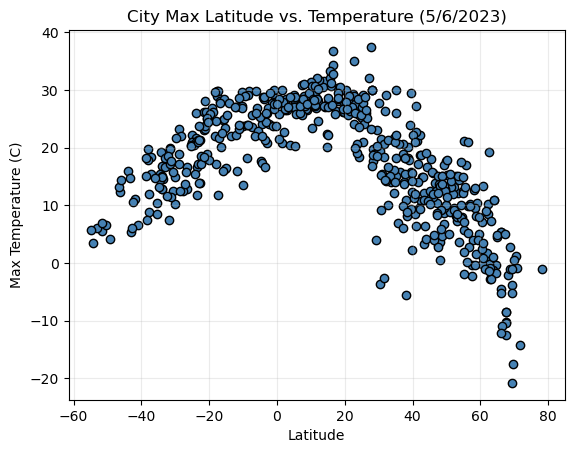

In [73]:
# create scatter plot for lat vs. max temp
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor="steelblue", edgecolor="black")

# title, axes, and gridlines
plt.title("City Max Latitude vs. Temperature (5/6/2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(alpha=0.25)

# save png
plt.savefig("output_data/Fig1.png")

#### Latitude Vs. Humidity

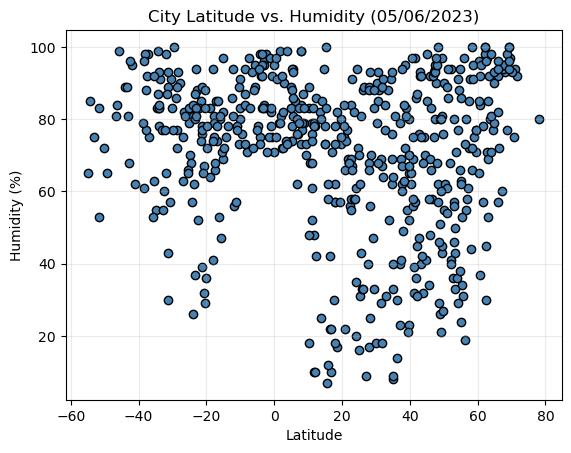

In [74]:
# create scatter plot for lat vs. max temp
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor="steelblue", edgecolor="black")

# title, axes, and gridlines
plt.title("City Latitude vs. Humidity (05/06/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(alpha=0.25)

# save png
plt.savefig("output_data/Fig2.png")

#### Latitude Vs. Cloudiness

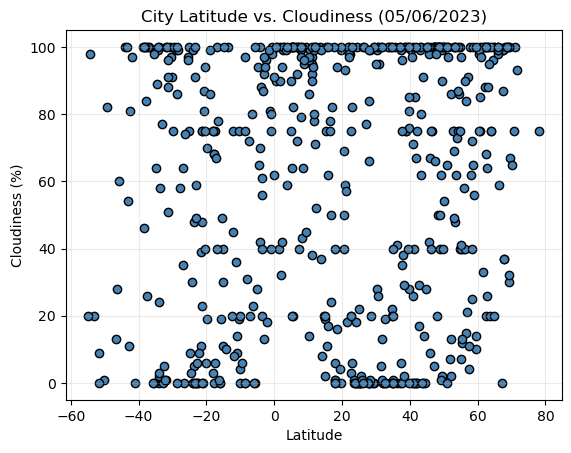

In [75]:
# create scatter plot for lat vs. max temp
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor="steelblue", edgecolor="black")

# title, axes, and gridlines
plt.title("City Latitude vs. Cloudiness (05/06/2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(alpha=0.25)

# save png
plt.savefig("output_data/Fig3.png")

#### Latitude vs. Wind Speed Plot

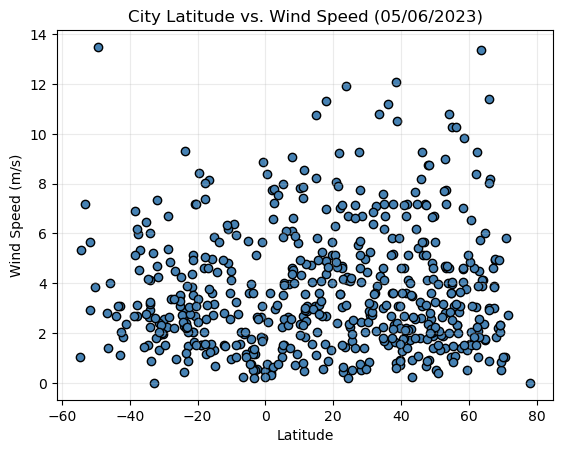

In [76]:
# create scatter plot for lat vs. max temp
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor="steelblue", edgecolor="black")

# title, axes, and gridlines
plt.title("City Latitude vs. Wind Speed (05/06/2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(alpha=0.25)

# save png
plt.savefig("output_data/Fig4.png")

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [77]:
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

In [78]:
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Pedernales,18.0384,-71.7440,28.07,62,6,4.36,DO,1683414197
1,Leoben,47.3461,15.1257,10.47,80,100,0.68,AT,1683414198
2,Yellowknife,62.4560,-114.3525,19.29,30,20,9.26,CA,1683414198
5,Hālol,22.5000,73.4667,29.38,56,98,3.06,IN,1683414198
6,Nova Sintra,14.8667,-24.7167,20.09,78,2,10.77,CV,1683414198


In [79]:
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,Edinburgh of the Seven Seas,-37.0676,-12.3116,15.37,75,100,5.32,SH,1683414198
4,Waitangi,-43.9535,-176.5597,16.01,89,100,2.68,NZ,1683414198
9,Grytviken,-54.2811,-36.5092,3.44,85,98,5.33,GS,1683414199
11,Puerto Natales,-51.7236,-72.4875,5.55,83,9,2.93,CL,1683414199
12,East Ballina,-28.8667,153.5833,18.90,86,99,2.23,AU,1683414199


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8458154623361808


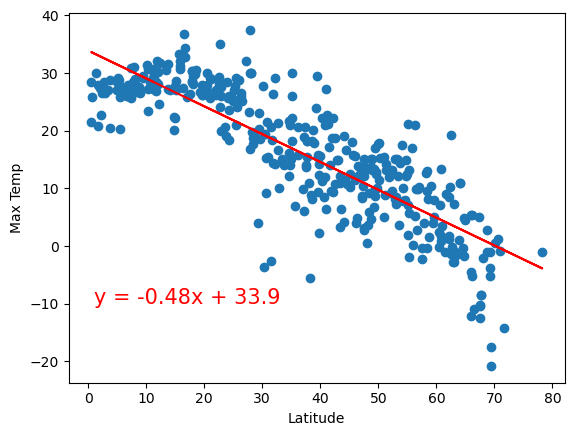

In [80]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression: 
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 1: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,-10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')


# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):

print(f"The r-value is: {rvalue}")

plt.savefig("Images/north_temp_lg.png")
plt.show()

The r-value is: 0.7754814638811509


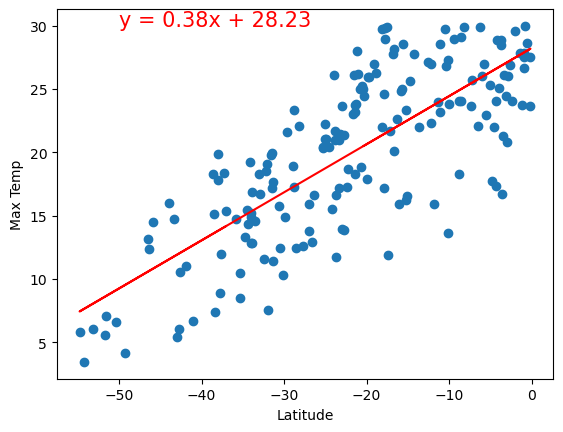

In [81]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression:
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 2: Southern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')


# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):

print(f"The r-value is: {rvalue}")

plt.savefig("Images/south_temp_lg.png")
plt.show()

**Discussion about the linear relationship:** The linear regression is modeling what happens to temperature as latitudes increase in the northern and southern hemispheres. In addition, this means that for the northern hemisphere as latitude increases you move further away from the equator. In the southern hemisphere latitudes decrease as we move away from the equator. For the northern hemisphere there is a significant negative correlation between latitude and maximum temperature. Whereas, in the southern hemisphere there is a positive correlation between latitude and maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08527983849152268


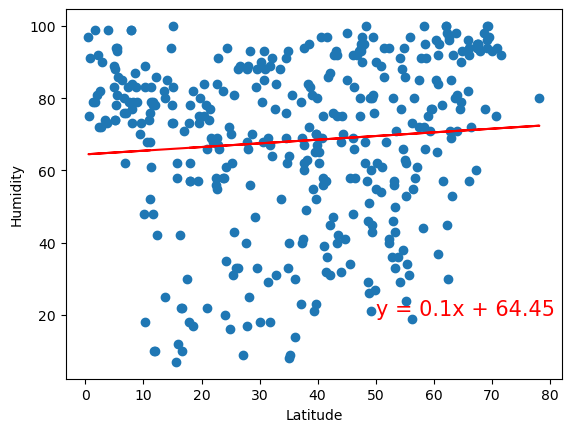

In [82]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 3: Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')


# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):

print(f"The r-value is: {rvalue}")

plt.savefig("Images/north_humidity_lg.png")
plt.show() 

The r-value is: 0.1126503008705114


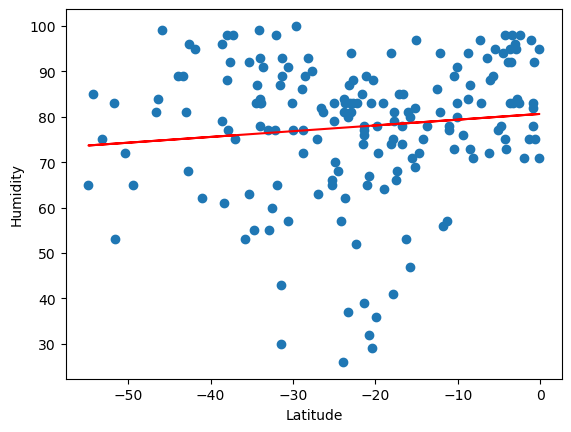

In [83]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 4: Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')


# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):

print(f"The r-value is: {rvalue}")

plt.savefig("Images/south_humidity_lg.png")
plt.show()

**Discussion about the linear relationship:** The linear regression is modeling what happens to humidity as latitude increases in the northern and southern hemispheres. As latitude increases for the northern hemisphere we move further away from the equator, and as latitude increases for the southern hemisphere we move closer to the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.031458795222390104


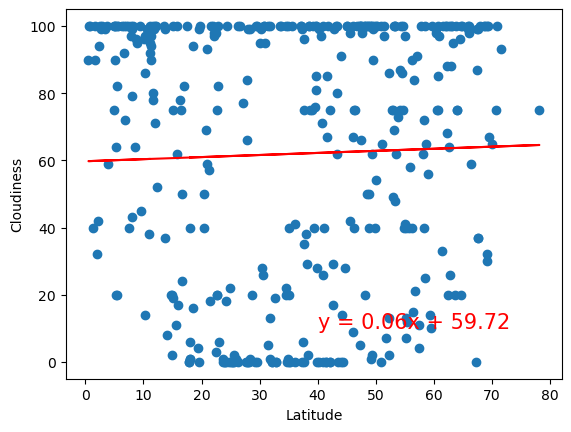

In [84]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 5: Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')


# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):

print(f"The r-value is: {rvalue}")

plt.savefig("Images/north_cloud_lg.png")
plt.show()

The r-value is: -0.00012485585371671285


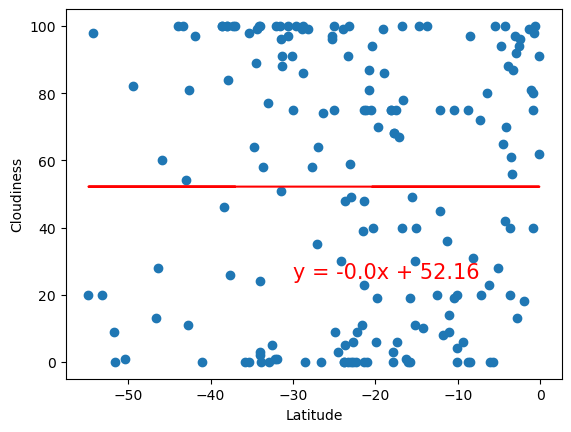

In [85]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression:
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 6: Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')


# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):

print(f"The r-value is: {rvalue}")

plt.savefig("Images/south_cloud_lg.png")
plt.show()

**Discussion about the linear relationship:** The linear regression is modeling what happens to cloudiness as latitudes increase in the northern and southern hemispheres. There is no relationship between latitude and cloudiness in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.04733918280552594


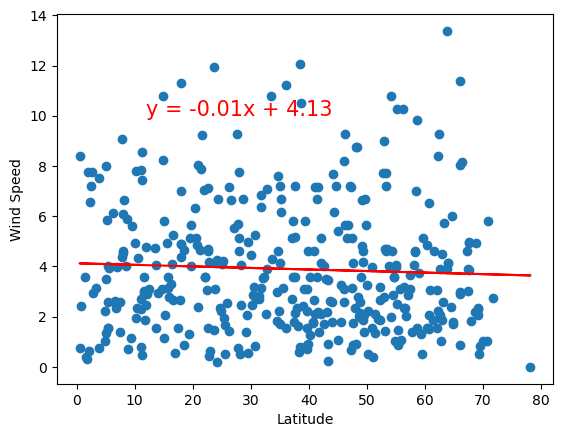

In [86]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression:
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 7: Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(12,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')


# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):

print(f"The r-value is: {rvalue}")

plt.savefig("Images/north_wind_lg.png")
plt.show() 

The r-value is: -0.19401709776149434


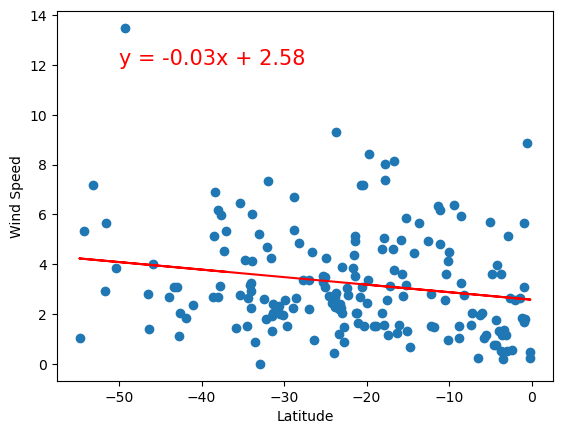

In [87]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression: 
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 8: Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')


# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):

print(f"The r-value is: {rvalue}")

plt.savefig("Images/south_wind_lg.png")
plt.show() 

**Discussion about the linear relationship:** The linear regression is modeling what happens to wind speed as latitudes increase in the northern and southern hemispheres. In the northern hemisphere, although the relationship between increasing latitude and wind speed is significant, there only appears to be a weak correlation. On the other hand, in the southern hemisphere there is no correlation between the increasing latitude and wind speed